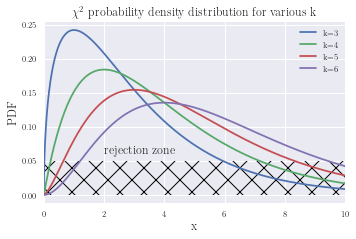

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.stats import chi2
from my_plot import set_size
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 1  # previous pdf hatch linewidth

# Using seaborn's style
plt.style.use('seaborn')
width = 345

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 12pt font in plots, to match 12pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.rcParams.update(tex_fonts)
def chi2_dist(chi2_obs,n):
    return (chi2**(n/2 -1)*np.exp(-chi2/2))/(2**(n/2)*gamma(n/2))
chi2_gen = np.linspace(0,20,10000)

chi2_3 = chi2.pdf(chi2_gen,3)
chi2_4 = chi2.pdf(chi2_gen,4)
chi2_5 = chi2.pdf(chi2_gen,5)
chi2_6 = chi2.pdf(chi2_gen,6)
plt.figure(figsize=set_size(390))
plt.title(r"$\chi^2$ probability density distribution for various k")
plt.xlabel("x")
plt.ylabel("PDF")
plt.plot(chi2_gen,chi2_3,label="k=3")
plt.plot(chi2_gen,chi2_4,label="k=4")
plt.plot(chi2_gen,chi2_5,label="k=5")
plt.plot(chi2_gen,chi2_6,label="k=6")
#plt.plot([0,10],[0.05,0.05],"--",color="black")
plt.fill_between([0,10],[np.sqrt(0.05**2),np.sqrt(0.05**2)],facecolor="none",hatch="X",edgecolor="black",linewidth=0.0)
plt.text(2.0,0.06,s="rejection zone")
plt.xlim(0,10)
plt.legend()
plt.savefig("chi2_pdf.pdf",format="PDF")

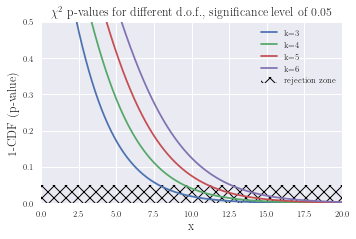

In [97]:
plt.figure(figsize=set_size(390))
plt.title(r"$\chi^2$ p-values for different d.o.f., significance level of 0.05")
plt.xlabel("x")
plt.ylabel(r"1-CDF (p-value)")
plt.plot(chi2_gen,1-chi2.cdf(chi2_gen,3),label="k=3")
plt.plot(chi2_gen,1-chi2.cdf(chi2_gen,4),label="k=4")
plt.plot(chi2_gen,1-chi2.cdf(chi2_gen,5),label="k=5")
plt.plot(chi2_gen,1-chi2.cdf(chi2_gen,6),label="k=6")
plt.fill_between([0,20],[0.05,0.05],facecolor="none",hatch="XX",edgecolor="black",linewidth=0.0,label="rejection zone")
plt.ylim(0,0.5)
plt.xlim(0,20)
plt.legend()
plt.savefig("chi2_cdf.pdf",format="PDF")

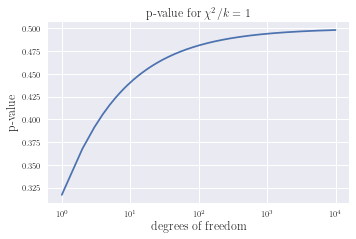

In [109]:
plt.figure(figsize=set_size(390))
plt.title(r"p-value for $\chi^2/k = 1$")
plt.xlabel("degrees of freedom")
plt.ylabel("p-value")
dofs = np.linspace(1,10000,10000)
p_vals = 1-chi2.cdf(dofs,dofs)
plt.xscale("log")
plt.plot(dofs,p_vals)
plt.savefig("chi2_red_justification.pdf",format="PDF")